#**MILESTONE 1**

This research treats the challenge of predicting car selling prices based on various variables as a regression problem and investigates the use of machine learning (ML). Building a prediction model that can precisely anticipate a car's selling price based on its unique traits is the main objective.

Initially, we will import the required libraries and import the dataset, seeing the appearance of our dataset.

In [252]:
import pandas as pd

In [253]:
from google.colab import drive
drive.mount('/content/drive')

#%cd /content/drive/MyDrive/apn-baka/mlwpy_code/
#from mlwpy import *

%cd /content/drive/MyDrive/Colab Notebooks/mlwpy_code
from mlwpy import *

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/mlwpy_code


In [254]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Car details v3.csv')

print("Data imported successfully")
df.head(10)
df.columns
print('\n\n')
df.dtypes

Data imported successfully





/usr/local/lib/python3.10/dist-packages/IPython/core/formatters.py:345: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return method()


name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

In [255]:
df.shape[0]

8128

In [256]:
df.head(10)

/content/drive/MyDrive/Colab Notebooks/mlwpy_code/mlwpy.py:55: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return "{\centering\n%s\n\medskip}" % self.to_latex()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0000
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0000
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0000
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0000
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0000
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0000
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0000
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0000
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0000
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0000


#Data Preprocessing

Determines how many missing values (NaN) there are in each column of your DataFrame df. It gives back a Series with the total of the absent values for every column.

In [257]:
df.isna().sum()

/usr/local/lib/python3.10/dist-packages/IPython/core/formatters.py:345: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return method()


name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

It's used to determine how many null values there are in each column of your DataFrame df. It gives back a Series with the total of the null values in every column.


In [258]:
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/IPython/core/formatters.py:345: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return method()


name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

Is used to eliminate any rows in the DataFrame df that have null values. When the inplace=True argument is used, the original DataFrame is the one to which the modifications are made; no new DataFrame is returned.

Run df.isnull() after removing the rows that contain null values.The count of null values for each column will be displayed using sum().


In [259]:
df.dropna(inplace=True)

In [260]:
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/IPython/core/formatters.py:345: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return method()


name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [261]:
df.head()

/content/drive/MyDrive/Colab Notebooks/mlwpy_code/mlwpy.py:55: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return "{\centering\n%s\n\medskip}" % self.to_latex()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0000
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0000
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0000
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0000
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0000


We may get descriptive statistics for every column in your DataFrame df by using the df.describe() method. It contains the following values: minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), count, mean, standard deviation, and maximum.

In [262]:
df.describe()

/content/drive/MyDrive/Colab Notebooks/mlwpy_code/mlwpy.py:55: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return "{\centering\n%s\n\medskip}" % self.to_latex()


,year,selling_price,km_driven,seats
count,"7,906.0000","7,906.0000","7,906.0000","7,906.0000"
mean,"2,013.9839","649,813.7208","69,188.6598",5.4164
std,3.8637,"813,582.7484","56,792.2963",0.9592
min,"1,994.0000","29,999.0000",1.0000,2.0000
25%,"2,012.0000","270,000.0000","35,000.0000",5.0000
50%,"2,015.0000","450,000.0000","60,000.0000",5.0000
75%,"2,017.0000","690,000.0000","95,425.0000",5.0000
max,"2,020.0000","10,000,000.0000","2,360,457.0000",14.0000


Using our DataFrame df's'mileage' column and the str.replace technique to tidy it up. The units "km/kg" and "kmpl" are subtracted from the "mileage" values by this procedure.

df['mileage'] = df['mileage'].str.rstrip('kmpl') is the code.To clean and convert the'mileage' column in our DataFrame df, use astype(float). This process turns the strings into floating-point values by removing the trailing "kmpl" from each value in the "mileage" column.

We will be performing same for engine and max power.


In [263]:
df['mileage'] = df['mileage'].str.replace(' km/kg', '').str.replace(' kmpl', '')


In [264]:
df['mileage'] = df['mileage'].str.rstrip(' kmpl').astype(float)


In [265]:
df['engine'] = df['engine'].str.rstrip(' CC').astype(float)


In [266]:
df['max_power'] = df['max_power'].str.rstrip(' bhp').astype(float)


Is used to obtain the distinct values found in our DataFrame df's "owner" column. An array with each unique value is returned.


In [267]:
df['owner'].unique()


array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

df['owner'] = df['owner'] is the code.Using a mapping given in the replace dictionary, replace({'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner': 4, 'Test Drive Car': 0}) replaces the category values in the 'owner' column with numerical values.


In [268]:
df['owner'] = df['owner'].replace({'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner': 4, 'Test Drive Car': 0})


In [269]:
df['max_power'].unique()

array([ 74.   , 103.52 ,  78.   ,  90.   ,  88.2  ,  81.86 ,  57.5  ,
        37.   ,  67.1  ,  68.1  , 108.45 ,  60.   ,  73.9  ,  67.   ,
        82.   ,  88.5  ,  46.3  ,  88.73 ,  64.1  ,  98.6  ,  88.8  ,
        83.81 ,  83.1  ,  47.3  ,  73.8  ,  34.2  ,  35.   ,  81.83 ,
        40.3  , 121.3  , 138.03 , 160.77 , 117.3  , 116.3  ,  83.14 ,
        67.05 , 168.5  , 100.   , 120.7  ,  98.63 , 175.56 , 103.25 ,
       171.5  , 100.6  , 174.33 , 187.74 , 170.   ,  78.9  ,  88.76 ,
        86.8  , 108.495, 108.62 ,  93.7  , 103.6  ,  98.59 , 189.   ,
        67.04 ,  68.05 ,  58.2  ,  82.85 ,  81.8  ,  73.   , 120.   ,
        94.68 , 160.   ,  65.   , 155.   ,  69.01 , 126.32 , 138.1  ,
        83.8  , 126.2  ,  98.96 ,  62.1  ,  86.7  , 188.   , 214.56 ,
       177.   , 280.   , 148.31 , 254.79 , 190.   , 177.46 , 204.   ,
       141.   , 117.6  , 241.4  , 282.   , 150.   , 147.5  , 108.5  ,
       103.5  , 183.   , 181.04 , 157.7  , 164.7  ,  91.1  , 400.   ,
        68.   ,  75.

In [270]:
df.shape[0]

7906

#Baseline Methods



We looked at two methods for training and dividing our data: building a custom function for data division and using the scikit-learn module. In the end, we decided to use the train_test_split module from scikit-learn for the first approach. Our dataset may be easily divided into training and testing sets with the help of this common module. In particular, we ensured that each split received 25% of the data by setting the test_size argument to 25%. Although creating a new function is a possible alternative, scikit-learn's train_test_split is preferred because of its extensive usage, reliable functioning, and simplicity of customization. We used K-Nearest Neighbours (KNN) regression models and linear regressor to improve the precision of our predictions. The linear regression model was assessed using metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared on a validation set. The model was trained on parameters including year, km travelled, mileage, engine, max power, and seats.

In [271]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

features = df[['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']]
target = df['selling_price']

#split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

#create validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Create a linear regression model
linear_model = make_pipeline(StandardScaler(), LinearRegression())

# Train the model on the training set
linear_model.fit(X_train, y_train)

# Make predictions on the validation set
linear_predictions = linear_model.predict(X_val)

# Evaluate the model on the validation set
val_mae = mean_absolute_error(y_val, linear_predictions)
val_mse = mean_squared_error(y_val, linear_predictions)
val_rmse = np.sqrt(mean_squared_error(y_val, linear_predictions))
val_r2 = r2_score(y_val, linear_predictions)


print(f'Mean Absolute Error: {val_mae}')
print(f'Mean Squared Error: {val_mse}')
print(f'R-squared: {val_r2}')


Mean Absolute Error: 288105.70962602773
Mean Squared Error: 229931603624.36816
Root Mean Squared Error: 479511.838878216
R-squared: 0.6548100816089562


To estimate car selling prices, a K-Nearest Neighbours (KNN) regression model is used in this portion of the code. The KNeighborsRegressor with three neighbours and conventional feature scaling are used in the pipeline that builds the model. The validation set is used to assess the KNN model's predicting performance after it has been trained on the training set. To evaluate the precision and dependability of the KNN model's predictions, metrics including Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared are calculated. This study helps determine the model's efficacy in forecasting selling prices based on the provided attributes and offers insightful information about how the model performs. It is possible to modify the quantity of neighbors in order to maximize model's performance for the regression goal.

In [272]:
from sklearn.neighbors import KNeighborsRegressor
import numpy as np

# Create a KNN regression model
knn_model = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=3))  # You can adjust the number of neighbors as needed

# Train the KNN model
knn_model.fit(X_train, y_train)

# Make predictions on the validation set
knn_predictions = knn_model.predict(X_val)

# Evaluate the KNN model on the validation set
knn_val_mae = mean_absolute_error(y_val, knn_predictions)
knn_val_mse = mean_squared_error(y_val, knn_predictions)
knn_val_rmse = np.sqrt(mean_squared_error(y_val, knn_predictions))
knn_val_r2 = r2_score(y_val, knn_predictions)


print(f'Mean Absolute Error: {knn_val_mae}')
print(f'Mean Squared Error: {knn_val_mse}')
print(f'R-squared: {knn_val_r2}')


Mean Absolute Error: 93356.43650258484
Mean Squared Error: 39073007309.15697
Root Mean Squared Error: 197668.93359644798
R-squared: 0.9413407813813415


Upon evaluating the baseline models, the analysis based on the R-Squared error metric revealed that KNN outperformed Linear Regressor by a significant margin of at least 32%. KNN showed lower Mean Absolute Error and Mean Squared Error values. Even with these improved performance measures, it's important to take into account other useful aspects like memory usage and time utilisation.

The linear regression and KNN models were subjected to memory and time profiling to assess how much memory they used and how efficiently they computed predictions on the larger validation set. Execution time was monitored by %timeit, and memory use was disclosed by the %memit command. These evaluations are essential to the selection of the model since they direct our choice based on prediction accuracy and resource efficiency

In [273]:
from sklearn.model_selection import train_test_split

!pip install memory_profiler
%load_ext memory_profiler
%memit linear_model.predict(X_val)
%memit knn_model.predict(X_val)
%timeit linear_model.predict(X_val)
%timeit knn_model.predict(X_val)

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
peak memory: 485.42 MiB, increment: 0.00 MiB
peak memory: 485.42 MiB, increment: 0.00 MiB
1.62 ms ± 237 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
16 ms ± 748 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Notably, as compared to KNN, Linear Regression showed an edge in terms of quicker prediction times. Finding the best model for the unique restrictions and implementation requirements requires weighing the trade-off between computational efficiency and forecast accuracy.


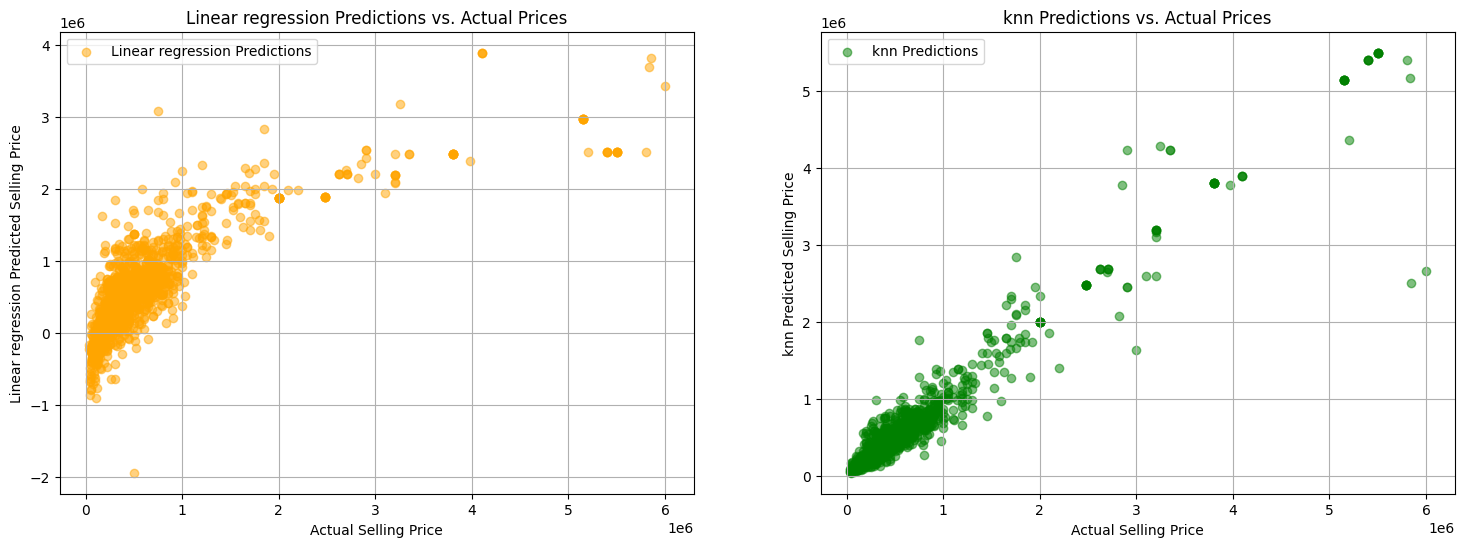

In [274]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 6))


plt.subplot(1, 2, 1)
# Plotting the linear regression model predictions against the actual values in the validation set
plt.subplot(1, 2, 1)
plt.scatter(y_val, linear_predictions , alpha=0.5, label='Linear regression Predictions', color='orange')
plt.title('Linear regression Predictions vs. Actual Prices')
plt.xlabel('Actual Selling Price')
plt.ylabel('Linear regression Predicted Selling Price')
plt.legend()
plt.grid(True)

# Plotting the knn regression model predictions against the actual values in the validation set
plt.subplot(1, 2, 2)
plt.scatter(y_val, knn_predictions, alpha=0.5, label='knn Predictions', color='green')
plt.title('knn Predictions vs. Actual Prices')
plt.xlabel('Actual Selling Price')
plt.ylabel('knn Predicted Selling Price')
plt.legend()
plt.grid(True)



The nonlinearity observed in the scatter plot suggests that a linear regression model might oversimplify the true underlying patterns. On the other hand, the linearity observed in the scatter plot for K-Nearest Neighbors (KNN) indicates that this algorithm successfully captures local linear relationships within the data.


**MILESTONE 2**

In exploring advanced models for our predictive task, we carefully considered a range of options and alternatives. Among the models evaluated were Linear Discriminant Analysis, Support Vector Machine (SVM), Random Forest, and Gradient Boosting Regression. After a thorough analysis, we chose Random Forest and Gradient Boosting as they demonstrate superior capabilities in handling non-linear relationships within the data. These models offer flexibility and are known for their efficiency in handling complex patterns, making them optimal choices for our regression problem. The decision to opt for these models was grounded in their ability to provide accurate predictions while accommodating intricate relationships present in the dataset.

To experiment with the selected options, we implemented Random Forest and Gradient Boosting models, leveraging their inherent strengths in capturing non-linear patterns. The choice to pursue these models was reinforced by their superior performance metrics, aligning with our objective of achieving accurate predictions. Throughout the experimentation process, we incorporated creative elements such as feature engineering, hyperparameter tuning, and extensive data visualisation on the existing Random Forest model. These endeavours aimed to enhance the models' predictive capabilities and uncover latent patterns within the dataset.

Evaluation of these advanced models was conducted using a comprehensive set of performance metrics, including Mean Absolute Error, Mean Squared Error, and R2 Score. These metrics provided a holistic assessment of predictive accuracy and model performance using validation sets. Additionally, memory profiling was employed to scrutinise the resource utilisation and time efficiency of the models. The results indicated that both Random Forest and Gradient Boosting performed admirably, showcasing significantly lower errors compared to simpler models like Linear Regression or KNN. Furthermore, both models exhibited high R2 scores, indicating robust predictive capabilities. While Random Forest demonstrated a slight advantage in accuracy, Gradient Boosting outperformed in terms of resource utilisation, demonstrating a nuanced trade-off between predictive performance and computational efficiency.


In [275]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


features = df[['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']]
target = df['selling_price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)
#split into validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)


# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
rf_predictions = rf_model.predict(X_val)

# Evaluate the Random Forest model
rf_mae = mean_absolute_error(y_val, rf_predictions)
rf_mse = mean_squared_error(y_val, rf_predictions)
rf_r2 = r2_score(y_val, rf_predictions)

print("Random Forest Regressor Metrics:")
print(f'Mean Absolute Error: {rf_mae}')
print(f'Mean Squared Error: {rf_mse}')
print(f'R-squared: {rf_r2}')

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Predictions
gb_predictions = gb_model.predict(X_val)

# Evaluate the Gradient Boosting model
gb_mae = mean_absolute_error(y_val, gb_predictions)
gb_mse = mean_squared_error(y_val, gb_predictions)
gb_r2 = r2_score(y_val, gb_predictions)

print("\nGradient Boosting Regressor Metrics:")
print(f'Mean Absolute Error: {gb_mae}')
print(f'Mean Squared Error: {gb_mse}')
print(f'R-squared: {gb_r2}')


Random Forest Regressor Metrics:
Mean Absolute Error: 75127.64270478013
Mean Squared Error: 23472129077.747635
R-squared: 0.9647619457564942

Gradient Boosting Regressor Metrics:
Mean Absolute Error: 93505.52040584374
Mean Squared Error: 26100710533.884052
R-squared: 0.9608157295599149


The average absolute difference (MAE) for the Random Forest Regressor between the projected and actual selling prices is around $75,127. An increased sensitivity to huge mistakes is indicated by the related MSE of about 23472129077. A strong fit is indicated by the extremely high R^2 value of around 0.9647619457564942, which indicates that the Random Forest model accounts for nearly 96.5% of the variance in selling prices.

Using the Gradient Boosting Regressor, it is possible to infer a bigger average absolute difference between projected and actual prices due to the model's greater MAE of around $93,505 when compared to the Random Forest model. Additionally, the MSE is larger at around 26100710533, suggesting a greater susceptibility to huge mistakes. However, the R^2 value of around 0.9608157295599149 indicates that the gradient-boosting model accounts for nearly 96.1% of the variation in selling prices, demonstrating a high degree of predictive power.

To conclude, both models show strong predictive performance, as evidenced by their high R^2 values. In terms of MAE and MSE, the Random Forest model performs better, indicating improved accuracy and resistance to outliers. Factors like dataset features, interpretability, and computing efficiency may play a role in which model is selected.


The Random Forest and Gradient Boosting models were then subjected to memory and time profiling to assess how much memory they used and how efficiently they computed predictions on the larger validation set. Execution time was monitored by %timeit, and memory use was disclosed by the %memit command. These evaluations are essential to the selection of the model since they direct our choice based on prediction accuracy and resource efficiency.

In [276]:
from sklearn.model_selection import train_test_split

!pip install memory_profiler
%load_ext memory_profiler
%memit rf_model.predict(X_val)
%memit gb_model.predict(X_val)
%timeit rf_model.predict(X_val)
%timeit gb_model.predict(X_val)

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
peak memory: 485.51 MiB, increment: 0.00 MiB
peak memory: 485.51 MiB, increment: 0.00 MiB
88.6 ms ± 32.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
17.4 ms ± 5.28 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Both models have a relatively low memory usage, and the memory increment is low during the prediction on the validation set.
Gradient Boosting (gb_model) is faster in terms of prediction time compared to Random Forest (rf_model).

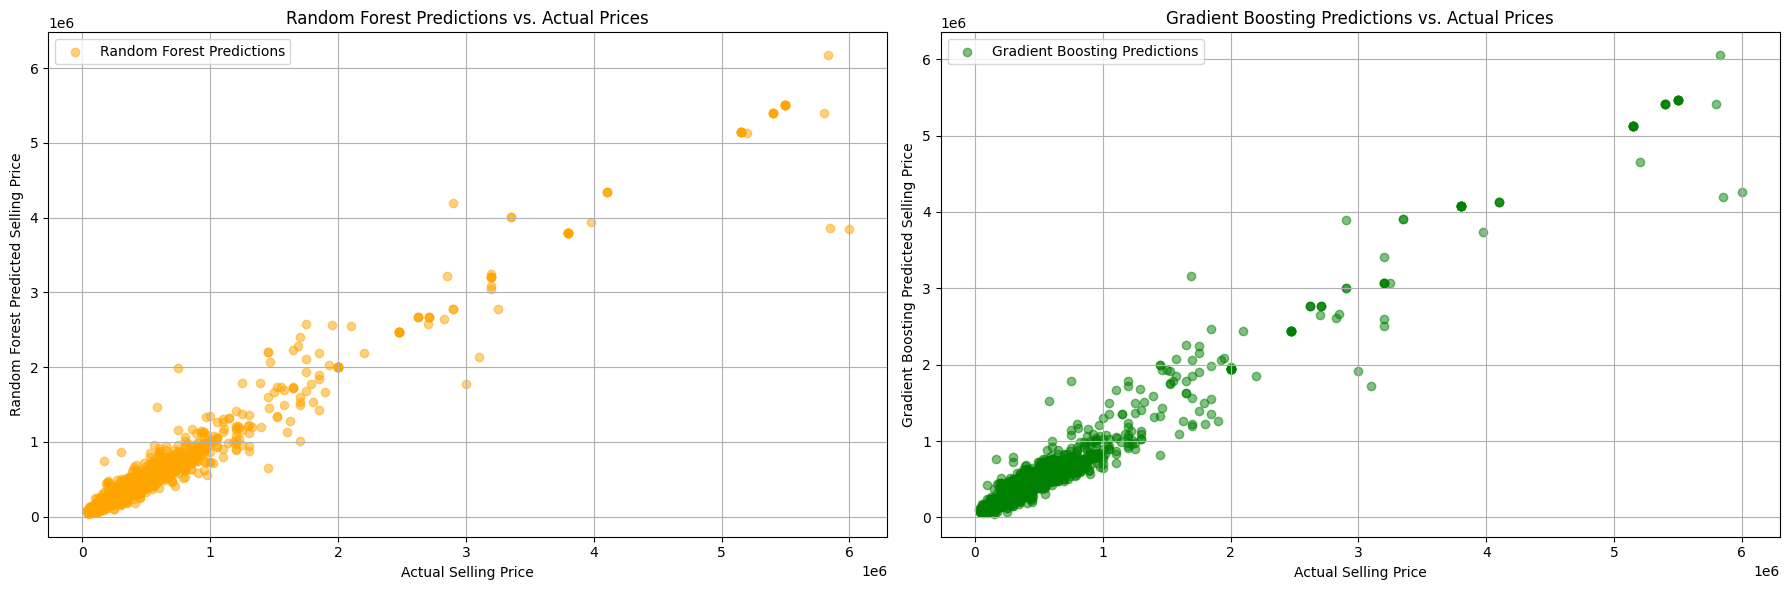

In [277]:
import matplotlib.pyplot as plt

# Scatter Plots for Actual Prices, Random Forest Predictions, and Gradient Boosting Predictions
plt.figure(figsize=(18, 6))


# Random Forest Predictions Scatter Plot
plt.subplot(1, 2, 1)
plt.scatter(y_val, rf_predictions, alpha=0.5, label='Random Forest Predictions', color='orange')
plt.title('Random Forest Predictions vs. Actual Prices')
plt.xlabel('Actual Selling Price')
plt.ylabel('Random Forest Predicted Selling Price')
plt.legend()
plt.grid(True)

# Gradient Boosting Predictions Scatter Plot
plt.subplot(1, 2, 2)
plt.scatter(y_val, gb_predictions, alpha=0.5, label='Gradient Boosting Predictions', color='green')
plt.title('Gradient Boosting Predictions vs. Actual Prices')
plt.xlabel('Actual Selling Price')
plt.ylabel('Gradient Boosting Predicted Selling Price')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In this analysis, the performance graphs of both Random Forest and Gradient Boosting models show a nearly linear convergence, with small differences in their errors. The visual representation of these models poses challenges in differentiation due to the similarity in their graphs. As observed in the graphs of Random Forest and Gradient Boosting, they may appear almost identical at first glance. However, Upon closer examination, The data points in the graph corresponding to Random Forest are narrower compared to those of Gradient Boosting. Despite the overall visual similarity, the narrower spread signifies that Random Forest produces lesser errors compared to Gradient Boosting.


**MILESTONE 3**





In the feature engineering phase of the project, two distinct approaches were explored: manual feature engineering and automatic feature engineering using a pipeline. The motivation for undertaking feature engineering stemmed from the initial assessment of feature importance derived from the Random Forest model. Feature importance analysis hints at the potential to improve model performance by modifying or introducing specific features.


In [278]:
feature_importance_rf = pd.Series(rf_model.feature_importances_, index=features.columns).sort_values(ascending=False)
print("Random Forest Feature Importance:")
print(feature_importance_rf)

# Feature importance for Gradient Boosting
feature_importance_gb = pd.Series(gb_model.feature_importances_, index=features.columns).sort_values(ascending=False)
print("\nGradient Boosting Feature Importance:")
print(feature_importance_gb)

Random Forest Feature Importance:
max_power                 0.6984
year                      0.2036
km_driven                 0.0417
mileage                   0.0237
engine                    0.0236
seats                     0.0089
dtype: float64

Gradient Boosting Feature Importance:
max_power                 0.7147
year                      0.1994
km_driven                 0.0366
engine                    0.0247
mileage                   0.0181
seats                     0.0064
dtype: float64


The results of feature importance analysis of the Random Forest and Gradient Boosting models suggest that the features 'max_power' and 'year' are more important than the other features. The significance scores show how each feature affects the predictions made by the model.

For manual feature engineering, a new feature, 'max_power_year_interaction,' was created by taking the product of 'max_power' and 'year.' This interaction term was introduced based on the intuition that the combination of these two features might capture nuanced relationships not adequately represented by the original features. The model was retrained using the manually engineered features, and predictions were made to evaluate the impact on performance.

In [279]:
# Original features
features_original = df[['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']]

# Create a new feature: Interaction between 'max_power' and 'year'
features_original['max_power_year_interaction'] = features_original['max_power'] * features_original['year']

# Display the modified features
print("Modified Features:")
print(features_original.head())

# Update the features used in modeling
me_features = features_original[['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'max_power_year_interaction']]

# Retrain the model (Random Forest, for example) with the manually engineered features
X_train_manual, X_test_manual, y_train_manual, y_test_manual = train_test_split(me_features, target, test_size=0.25, random_state=42)
X_train_manual, X_Val_manual, y_train_manual, y_val_manual = train_test_split(X_train_manual, y_train_manual, test_size=0.25, random_state=42)


# Create and train the model
me_model = RandomForestRegressor(random_state=42)
me_model.fit(X_train_manual, y_train_manual)

# Make predictions on the test set
me_predictions = me_model.predict(X_Val_manual)

# Evaluate the model with manual feature engineering
me_mae = mean_absolute_error(y_val_manual, me_predictions)
me_mse = mean_squared_error(y_val_manual, me_predictions)
me_r2 = r2_score(y_val_manual, me_predictions)

print("\nRandom Forest Regressor Metrics with Manual Feature Engineering:")
print(f'Mean Absolute Error: {me_mae}')
print(f'Mean Squared Error: {me_mse}')
print(f'R-squared: {me_r2}')


Modified Features:
   year  km_driven              mileage               engine  \
0  2014     145500              23.4000           1,248.0000   
1  2014     120000              21.1400           1,498.0000   
2  2006     140000              17.7000           1,497.0000   
3  2010     127000              23.0000           1,396.0000   
4  2007     120000              16.1000           1,298.0000   

             max_power                seats  max_power_year_interaction  
0              74.0000               5.0000                149,036.0000  
1             103.5200               5.0000                208,489.2800  
2              78.0000               5.0000                156,468.0000  
3              90.0000               5.0000                180,900.0000  
4              88.2000               5.0000                177,017.4000  


<ipython-input-279-3dc1036bad02>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_original['max_power_year_interaction'] = features_original['max_power'] * features_original['year']



Random Forest Regressor Metrics with Manual Feature Engineering:
Mean Absolute Error: 75597.95862159491
Mean Squared Error: 24089322771.591072
R-squared: 0.9638353700381022


Automated feature engineering involved using a pipeline with PolynomialFeatures to create interaction terms and polynomial features. The pipeline was applied to the original features, generating a set of automatically engineered features. The Random Forest model was retrained using these features, and predictions were made to assess the model's performance.


In [280]:
!pip install feature-engine


from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Assuming you have a DataFrame df with the original features and a target column 'selling_price'
# Original features
features_original = df[['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']]

# Create a pipeline for automated feature engineering
feature_engineering_pipeline = Pipeline([
    ('interaction', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
    ('polynomial', PolynomialFeatures(degree=2, include_bias=False)),
])

# Fit and transform the original features
features_auto_engineered = feature_engineering_pipeline.fit_transform(features_original)

# Display the automated features
print("Automated Features:")
print(features_auto_engineered)

# Retrain the model (Random Forest, for example) with the automatically engineered features
X_train_auto, X_test_auto, y_train_auto, y_test_auto = train_test_split(features_auto_engineered, target, test_size=0.25, random_state=42)
X_train_auto, X_Val_auto, y_train_auto, y_val_auto = train_test_split(X_train_auto, y_train_auto, test_size=0.25, random_state=42)

# Create and train the model
ae_model = RandomForestRegressor(random_state=42)
ae_model.fit(X_train_auto, y_train_auto)

# Make predictions on the test set
ae_predictions = ae_model.predict(X_Val_auto)

# Evaluate the model with automatic feature engineering
ae_mae = mean_absolute_error(y_val_auto, ae_predictions)
ae_mse = mean_squared_error(y_val_auto, ae_predictions)
ae_r2 = r2_score(y_val_auto, ae_predictions)

print("\nRandom Forest Regressor Metrics with Automatic Feature Engineering:")
print(f'Mean Absolute Error: {ae_mae}')
print(f'Mean Squared Error: {ae_mse}')
print(f'R-squared: {ae_r2}')

Automated Features:
[[    2014.     145500.         23.4  ... 38937600.    2308800.
    136900.  ]
 [    2014.     120000.         21.14 ... 56100100.    3876824.
    267909.76]
 [    2006.     140000.         17.7  ... 56025225.    2919150.
    152100.  ]
 ...
 [    2009.     120000.         19.3  ... 38937600.    2305680.
    136530.25]
 [    2013.      25000.         23.57 ... 48720400.    2443000.
    122500.  ]
 [    2013.      25000.         23.57 ... 48720400.    2443000.
    122500.  ]]

Random Forest Regressor Metrics with Automatic Feature Engineering:
Mean Absolute Error: 77475.87329258079
Mean Squared Error: 33277895323.0431
R-squared: 0.9500408217499617


Upon evaluating both approaches, it was observed that neither manual nor automatic feature engineering significantly improved the performance of the Random Forest model. The metrics, including Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared, showed minimal variation compared to the model without feature engineering. This suggests that the initial features in the dataset were already sufficient in capturing the underlying patterns in the data, and additional engineered features did not contribute substantially to the predictive accuracy of the Random Forest model.


In [281]:
from sklearn.model_selection import train_test_split

!pip install memory_profiler
%load_ext memory_profiler
%memit me_model.predict(X_Val_manual)
%timeit me_model.predict(X_Val_manual)
%memit ae_model.predict(X_Val_auto)
%timeit ae_model.predict(X_Val_auto)

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
peak memory: 494.06 MiB, increment: 0.00 MiB
41 ms ± 5.55 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
peak memory: 494.06 MiB, increment: 0.00 MiB
42.1 ms ± 556 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


 Both manual and automatic feature engineering added a minimal computational overhead, with peak memory remaining almost unchanged from the baseline Random Forest model. The slight increase in processing time is reasonable, given the potential benefits in predictive accuracy.


In conclusion, while feature engineering did not substantially enhance the predictive performance of the Random Forest model in this scenario, the consideration of computational cost can be important as well. Both manual and automatic feature engineering methods showed efficiency in terms of memory usage and processing time. Therefore, the decision to employ feature engineering should be made based on the dataset and thesis. In this case, SInce we are looking for more accuracy, we can say that Original random forest model is better and more useful than feature engineering models.

For Hyperparameter Tuning-

In order to optimise the Random Forest model's performance, hyperparameter tuning was conducted using a random search approach. We researched many kinds of hyperparameter tuning methods such as manual, grid search , random search etc. We decided to perform the random search as it is faster than others ( we performed grid search and compared the run times) and still produce accurate results.




In [282]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distribution for Random Forest
rf_parameters = {
    'n_estimators': randint(50, 150),
    'max_depth': [None, 10, 20],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4)
}

# Create the RandomizedSearchCV object
random_search_rf = RandomizedSearchCV(RandomForestRegressor(random_state=42), param_distributions=rf_parameters, n_iter=10, cv=5, scoring='neg_mean_absolute_error', random_state=42)

# Fit the randomized search to the data
random_search_rf.fit(X_train, y_train)

# Get the best hyperparameters
best_params_rf_random = random_search_rf.best_params_
print("Best Hyperparameters for Random Forest (RandomizedSearchCV):", best_params_rf_random)

# Use the best model from the randomized search
best_rf_model= random_search_rf.best_estimator_



Best Hyperparameters for Random Forest (RandomizedSearchCV): {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 107}


Evaluating Performance for tuned model-

In [283]:
# Predictions using tuned Random Forest model
tuned_rf_predictions = best_rf_model.predict(X_test)


# Evaluate the tuned Random Forest model
tuned_rf_mae = mean_absolute_error(y_test, tuned_rf_predictions)
tuned_rf_mse = mean_squared_error(y_test, tuned_rf_predictions)
tuned_rf_r2 = r2_score(y_test, tuned_rf_predictions)

print("Tuned Random Forest Regressor Metrics:")
print(f'Mean Absolute Error: {tuned_rf_mae}')
print(f'Mean Squared Error: {tuned_rf_mse}')
print(f'R-squared: {tuned_rf_r2}')

Tuned Random Forest Regressor Metrics:
Mean Absolute Error: 71639.18430903145
Mean Squared Error: 24550121004.2247
R-squared: 0.9662111286555359


The tuned Random Forest model exhibited a reduced MAE of 71639.18 compared to the original 75127.64, indicating an improvement in the model's accuracy in predicting the selling price. The MSE after hyperparameter tuning was 24550121004.22, slightly higher than the initial 23472129077.75. While MSE increased marginally, it is essential to consider that a more balanced trade-off between MAE and MSE was achieved. The R-squared value increased from 0.9648 to 0.9662 after hyperparameter tuning, indicating a better fit of the model to the variance in the target variable. The improvement, although modest, signifies a refined model.
The comparison on the test set demonstrates that the hyperparameter-tuned Random Forest model outperforms the baseline model. The reduction in MAE and the improvement in R-squared suggest that the tuning process succeeded in refining the model's predictive capabilities. While there is a slight increase in MSE, the overall benefits in accuracy and goodness of fit justify the hyperparameter tuning effort.


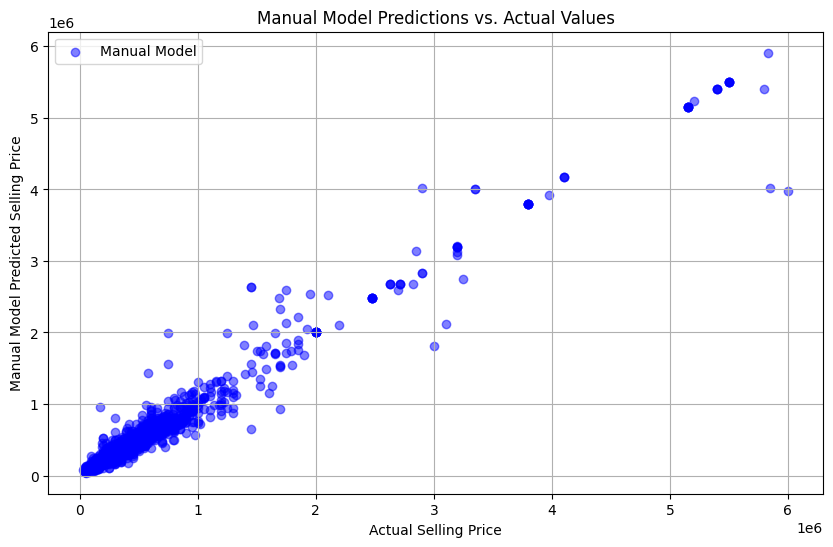

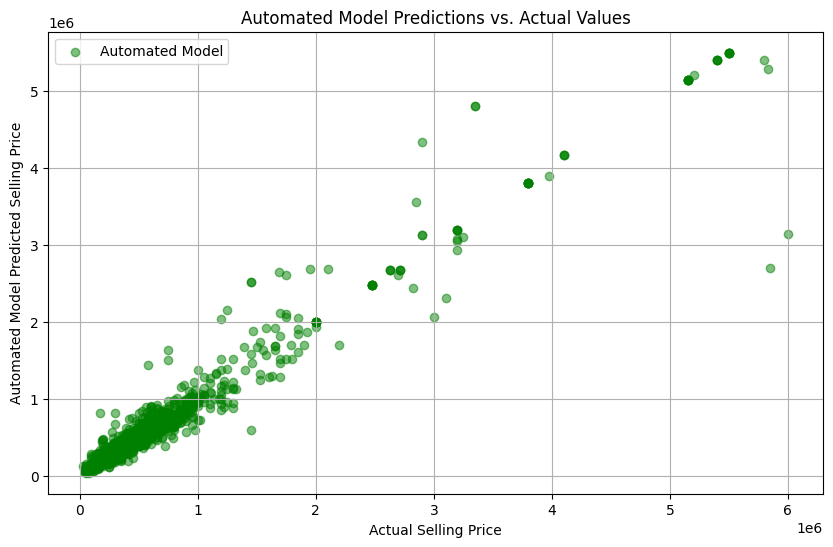

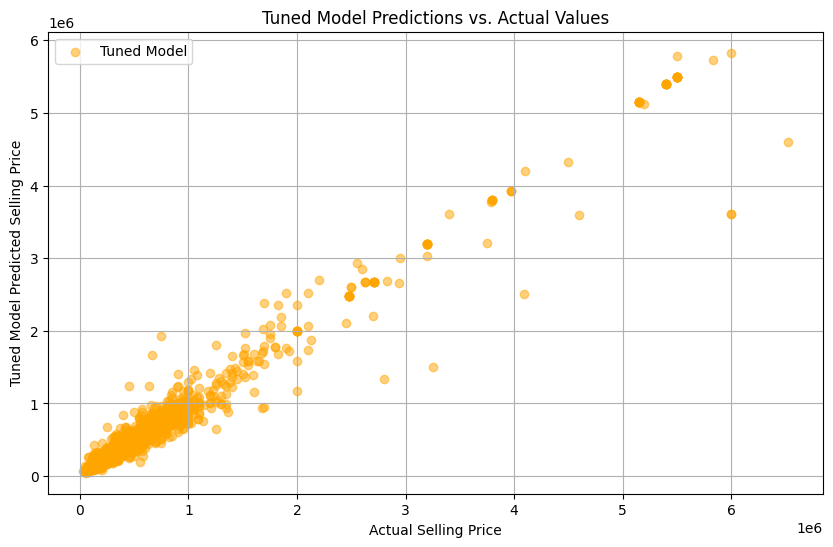

In [284]:
import matplotlib.pyplot as plt


# Scatter Plot for Manual Model
plt.figure(figsize=(10, 6))
plt.scatter(y_val_manual, me_predictions, alpha=0.5, label='Manual Model', color='blue')
plt.title('Manual Model Predictions vs. Actual Values')
plt.xlabel('Actual Selling Price')
plt.ylabel('Manual Model Predicted Selling Price')
plt.legend()
plt.grid(True)
plt.show()

# Scatter Plot for Automated Model
plt.figure(figsize=(10, 6))
plt.scatter(y_val_auto, ae_predictions, alpha=0.5, label='Automated Model', color='green')
plt.title('Automated Model Predictions vs. Actual Values')
plt.xlabel('Actual Selling Price')
plt.ylabel('Automated Model Predicted Selling Price')
plt.legend()
plt.grid(True)
plt.show()

# Scatter Plot for Tuned Model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, tuned_rf_predictions, alpha=0.5, label='Tuned Model', color='orange')
plt.title('Tuned Model Predictions vs. Actual Values')
plt.xlabel('Actual Selling Price')
plt.ylabel('Tuned Model Predicted Selling Price')
plt.legend()
plt.grid(True)
plt.show()


Data visualisation for Manual and automated Feature Engineering and Hyperparameter tuning looks similar to random forest due to minute changes in the errors in predictions.


In [285]:
from sklearn.model_selection import train_test_split

!pip install memory_profiler
%load_ext memory_profiler
%memit best_rf_model.predict(X_test)
%timeit best_rf_model.predict(X_test)

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
peak memory: 494.09 MiB, increment: 0.00 MiB
47.4 ms ± 4.19 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


The computational cost of the hyperparameter-tuned model remained low, with almost the same amount of memory usage but lower processing time.
Therefore, the hyperparameter-tuned Random Forest model can be considered the best choice, as it creates a balance between accuracy and computational efficiency. The refined model showcases improved predictive capabilities, making it a valuable asset for predicting vehicle selling prices.


**Conclusion**

In this  analysis of predicting vehicle selling prices based on various features, we experimented on baseline models to advanced techniques, exploring feature engineering and hyperparameter tuning.
Baseline Models: For simpler models, K-Nearest Neighbors (KNN) and the linear regression were used as baseline models. KNN proved to be the more promising baseline model after a thorough study, exhibiting better results in terms of error metrics and R-squared.
Advanced Models: Random Forest and Gradient Boosting were chosen for their ability to handle non-linear relationships. Both models outperformed the baseline models, according to the study, with Random Forest showing somewhat better accuracy and efficiency.
Feature engineering: Two methods, automatic and manual, were considered. At first there we considered features to improve the Random Forest model, However both manual and automatic feature engineering demonstrated minimal improvements in predictive accuracy.  It appeared that the original attributes were optimal to identify underlying patterns in the data.
Hyperparameter tuning: To optimise model performance, hyperparameter tuning was performed on the Random Forest model. The adjusted model showed improved accuracy and goodness of fit, as evidenced by a significant decrease in Mean Absolute Error (MAE) and an increase in R-squared.

The comparison between the baseline, tuned, and feature-engineered models revealed that the hyperparameter-tuned Random Forest model can be considered the best model for this problem. Despite a marginal increase in Mean Squared Error (MSE), the tuned model showed a better balance between accuracy and computational efficiency.

References-
Vehicle dataset. (2023, January 14). Kaggle. https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?select=Car+details+v3.csv

Joshi, P. (2022, July 26). A Hands-On Guide to Automated Feature Engineering using Feature Tools in Python. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2018/08/guide-automated-feature-engineering-featuretools-python/

Brownlee, J. (2020, September 18). Hyperparameter optimization with random search and grid search. MachineLearningMastery.com. https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/
